# 1.Введение

На мой взгляд, в современном мире медицинская диагностика стоит на пороге значительных трансформаций благодаря инновационным подходам, включая применение методов машинного обучения. Таким образом, машинное обучение, как раздел искусственного интеллекта, обрело широкое применение в различных областях, однако его роль в медицинской диагностике особенно значима. Это, вероятно, обусловлено не только возросшей доступностью и объемом данных в медицинской сфере, но и способностью алгоритмов машинного обучения выявлять довольно сложные закономерности и паттерны, которые человеческий мозг наверняка может упустить.  
  
**Целью** данной курсовой работы является исследование и анализ применения методов машинного обучения в задачах медицинской диагностики. Таким образом, рассмотрение этой темы представляет большой интерес, поскольку успешное применение алгоритмов машинного обучения может значительно повысить точность и скорость диагностики различных заболеваний, что в конечном итоге определенно приведет к улучшению результатов лечения и сокращению затрат на здравоохранение.  
  
В ходе работы будут рассмотрены основные принципы машинного обучения, используемые в медицинских задачах диагностики, а также наиболее распространенные методы и алгоритмы, применяемые в этой области.
  
Кроме того, в данной работе будет проанализирован конкретный пример успешного применения одного из методов машинного обучения в медицинской практике, а также выявлены возможности и перспективы развития данной области. На мой взгляд, исследование этих вопросов позволит более глубоко понять потенциал машинного обучения в медицинской диагностике и определить направления для будущих исследований и разработок.
  
В заключение, можно отметить, что применение методов машинного обучения в задачах медицинской диагностики открывает новые возможности для улучшения качества медицинского обслуживания и повышения эффективности лечения. Тем самым, данная работа направлена на обобщение современных достижений в этой области и выявление перспектив для ее дальнейшего развития.

# 2. Выбор датасета

Обоснование выбора датасета **Cardiovascular Disease dataset** с сайта Kaggle.com для проведения анализа:
  
1. **Актуальность проблемы**: Заболевания сердечно-сосудистой системы остаются одной из ведущих причин смерти по всему миру. Проведение анализа данных, связанных с сердечно-сосудистыми заболеваниями, имеет большое значение для выявления факторов риска, диагностики и профилактики этих заболеваний.  
  
2. **Качество данных**: Датасет Cardiovascular Disease dataset с сайта Kaggle.com известен своей широкой популярностью и хорошо структурированными данными. Это обеспечивает надежную основу для проведения анализа и применения методов машинного обучения.  
  
3. **Разнообразие признаков**: Данный датасет содержит разнообразные признаки, включая информацию о возрасте, поле, артериальном давлении, уровне холестерина и другие, что позволяет исследовать различные аспекты влияния этих параметров на развитие сердечно-сосудистых заболеваний.  
  
4. **Широкое применение**: Данные о сердечно-сосудистых заболеваниях имеют широкое применение в научных исследованиях, медицинской практике и образовательных целях. Проведение анализа на основе этого датасета позволит получить результаты, которые могут быть полезны как для научного сообщества, так и для практических применений в медицинской диагностике и профилактике.  
  
5. **Доступность и репрезентативность**: Датасет Cardiovascular Disease dataset с сайта Kaggle.com предоставляет доступ к большому объему данных, что обеспечивает их репрезентативность и достоверность для анализа. Кроме того, доступность данных позволяет широкому кругу исследователей повторять и проверять результаты анализа, что способствует достижению научной обоснованности и общей надежности выводов.  
  
Таким образом, выбор датасета Cardiovascular Disease dataset с сайта Kaggle.com для проведения анализа обоснован его актуальностью, качеством данных, разнообразием признаков, широким применением и доступностью, что делает его идеальным исходным материалом для исследований в области машинного обучения и медицинской диагностики.

# 3. Ход работы:

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay,roc_auc_score,roc_curve, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve

**Загрузка данных и основные сведения**

In [37]:
data = pd.read_csv("C:\\Users\\Yo\\Downloads\\cardio_train.csv", sep = ';')
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


**Описание датасета**

В датасете Cardiovascular Disease содержатся данные, характеризующие различные аспекты здоровья и образа жизни пациентов, а также информация о наличии или отсутствии сердечно-сосудистых заболеваний. Ниже приведено описание каждого признака:

1. **Возраст (age)**: Этот признак представлен в виде целого числа, указывающего возраст пациента в днях.

2. **Рост (height)**: Объективный признак, измеренный в сантиметрах, представляющий рост пациента.

3. **Вес (weight)**: Еще один объективный признак, измеренный в килограммах, указывающий массу тела пациента.

4. **Пол (gender)**: Категориальный признак, обозначающий пол пациента. Возможные значения: 1 - женский, 2 - мужской.

5. **Систолическое артериальное давление (ap_hi)**: Это значение кровяного давления в момент сокращения сердца, измеренное в миллиметрах ртутного столба.

6. **Диастолическое артериальное давление (ap_lo)**: Давление в артериях в момент между сокращениями сердца, также измеренное в миллиметрах ртутного столба.

7. **Уровень холестерина (cholesterol)**: Категориальный признак, описывающий уровень холестерина в крови. Возможные значения: 1 - нормальный, 2 - выше нормы, 3 - значительно выше нормы.

8. **Уровень глюкозы (gluc)**: Еще один категориальный признак, указывающий уровень глюкозы в крови. Возможные значения: 1 - нормальный, 2 - выше нормы, 3 - значительно выше нормы.

9. **Курение (smoke)**: Бинарный признак, указывающий, курит ли пациент. Значение 1 указывает на наличие привычки курения, а 0 - на ее отсутствие.

10. **Потребление алкоголя (alco)**: Еще один бинарный признак, указывающий, употребляет ли пациент алкоголь. Значение 1 означает наличие этой привычки, а 0 - ее отсутствие.

11. **Физическая активность (active)**: Бинарный признак, определяющий, ведет ли пациент активный образ жизни (1) или нет (0).

12. **Наличие или отсутствие сердечно-сосудистых заболеваний (cardio)**: Целевая переменная, являющаяся результатом исследования. Значение 1 указывает на наличие сердечно-сосудистых заболеваний, а 0 - на их отсутствие.

Эти характеристики предоставляют важную информацию для анализа и исследования факторов, влияющих на развитие сердечно-сосудистых заболеваний, и для создания моделей машинного обучения для их прогнозирования и диагностики.

**Размерность датасета**

In [38]:
print(f"Количество строк: {data.shape[0]}")
print(f"Количество колонок: {data.shape[1]}")

Количество строк: 70000
Количество колонок: 13


# Предварительный анализ данных

Проведение предварительного анализа данных перед использованием их для построения модели машинного обучения крайне важно по следующим причинам:

1. **Понимание данных**: Предварительный анализ поможет вам лучше понять данные, с которыми вы работаете. Вы сможете выявить общие тренды, распределения, выбросы и пропущенные значения, что позволит вам принять более обоснованные решения при построении модели.

2. **Предотвращение ошибок**: Анализ данных помогает выявить потенциальные проблемы, такие как дубликаты, несогласованность в данных, некорректные значения и т. д. Это помогает предотвратить ошибки и искажения в результатах моделирования.

3. **Выбор признаков**: Путем анализа данных мы сможем определить, какие признаки наиболее значимы для вашей задачи и какие можно исключить из рассмотрения. Это поможет сократить избыточность и повысить эффективность модели.

4. **Подготовка данных**: Важная часть предварительного анализа данных - это их подготовка. Это может включать в себя заполнение пропущенных значений, нормализацию данных, преобразование категориальных признаков и многое другое, что может улучшить качество модели.

5. **Оценка целевой переменной**: Анализ целевой переменной позволяет оценить ее распределение и баланс, что важно при выборе метрик оценки модели и определении стратегий борьбы с дисбалансом классов (если таковой имеется).

6. **Оценка взаимосвязей между признаками**: Предварительный анализ помогает определить наличие корреляций между признаками и возможные взаимосвязи, что может быть полезно при выборе модели и ее параметров.


 В целом, предварительный анализ данных позволяет создать более точные и надежные модели машинного обучения, что является ключом к успешному решению задачи.

**Информация о данных**

In [39]:
#проверим типы данных и полноту данных в столбцах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


**Проверка на наличие пропущенных значений**

In [40]:
missing_values = data.isnull().sum()
print(missing_values)

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


Все данные числовые, а также видно отсутствие пропущенных значений

In [41]:
#покажем статистику полученных данных
data.iloc[:,1:].describe().round(1)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0
mean,19468.9,1.3,164.4,74.2,128.8,96.6,1.4,1.2,0.1,0.1,0.8,0.5
std,2467.3,0.5,8.2,14.4,154.0,188.5,0.7,0.6,0.3,0.2,0.4,0.5
min,10798.0,1.0,55.0,10.0,-150.0,-70.0,1.0,1.0,0.0,0.0,0.0,0.0
25%,17664.0,1.0,159.0,65.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
50%,19703.0,1.0,165.0,72.0,120.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
75%,21327.0,2.0,170.0,82.0,140.0,90.0,2.0,1.0,0.0,0.0,1.0,1.0
max,23713.0,2.0,250.0,200.0,16020.0,11000.0,3.0,3.0,1.0,1.0,1.0,1.0


**Распределение целевой переменной**

In [8]:
print(data['cardio'].value_counts())
print(data['cardio'].value_counts(normalize=True))

0    35021
1    34979
Name: cardio, dtype: int64
0    0.5003
1    0.4997
Name: cardio, dtype: float64


**Визуализация распределения целевой переменной**

In [10]:
print("Уникальные значения целевой переменной:", data['cardio'].unique())

Уникальные значения целевой переменной: [0 1]


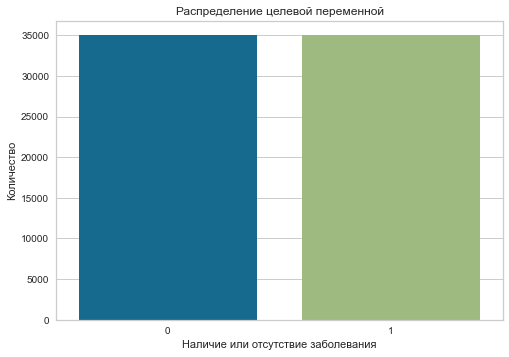

In [42]:
if data['cardio'].dtype == 'int64':
    data['cardio'] = data['cardio']
counts = data['cardio'].value_counts()
sns.countplot(x = data['cardio'], data=data)
plt.title('Распределение целевой переменной')
plt.xlabel('Наличие или отсутствие заболевания')
plt.ylabel('Количество')
plt.show()

Дисбаланса классов не наблюдается

# Очистка/подготовка данных

In [13]:
# Преобразование возраста из дней в годы для лучшего понимания и анализа
data['age'] = data['age'] / 365.25

In [14]:
# Отобразим столбец возраста
data.age

0        50.357290
1        55.381246
2        51.627652
3        48.249144
4        47.841205
           ...    
69995    52.676249
69996    61.878166
69997    52.199863
69998    61.412731
69999    56.235455
Name: age, Length: 70000, dtype: float64

In [15]:
import numpy as np
np.mean(data.age), np.median(data.age), np.min(data.age), np.max(data.age)

(53.30284959421098, 53.94387405886379, 29.56331279945243, 64.92265571526352)

Таким образом, среднее значение возраста исследуемого это **53.3** года, а мединное значение **53.9**   
Возраст самого младего исследуемого **29.5** года, а самого старшего **64.9**

Переименуем столбцы для лучшего понимания:

In [16]:
data = data.rename(columns={'ap_hi': 'systolic_b_pressure'})
data = data.rename(columns={'ap_lo': 'diastolic_b_pressure'})
data = data.rename(columns={'gluc': 'glucose'})
data = data.rename(columns={'alco': 'alcohol'})
data = data.rename(columns={'active': 'physically_active'})
data = data.rename(columns={'cardio': 'cardio_disease'})

1. **systolic_b_pressure (систолическое артериальное давление)**: Этот столбец содержит значения систолического артериального давления пациентов, измеренные в миллиметрах ртутного столба.

2. **diastolic_b_pressure (диастолическое артериальное давление)**: Здесь хранятся значения диастолического артериального давления, также измеренные в миллиметрах ртутного столба.

3. **glucose (уровень глюкозы)**: Этот столбец содержит информацию о уровне глюкозы в крови пациентов. Значения могут быть: 1 - нормальный, 2 - повышенный, 3 - значительно повышенный.

4. **alcohol (потребление алкоголя)**: В этом столбце указывается информация о потреблении алкоголя пациентами. Значение 1 обозначает наличие привычки употребления алкоголя, а 0 - отсутствие такой привычки.

5. **physically_active (физическая активность)**: Здесь содержится информация о физической активности пациентов. Значение 1 указывает на то, что пациент ведет активный образ жизни, а 0 - на обратное.

6. **cardio_disease (наличие сердечно-сосудистого заболевания)**: Этот столбец представляет собой целевую переменную и указывает наличие (1) или отсутствие (0) сердечно-сосудистого заболевания у пациента.

Эти переименованные столбцы являются важными признаками для анализа и моделирования данных о сердечно-сосудистых заболеваниях. Изменение их названий делает их более понятными и удобными для работы с ними в дальнейшем.

# Изучение данных

Гистограмма позволяет визуально оценить распределение значений признаков.:

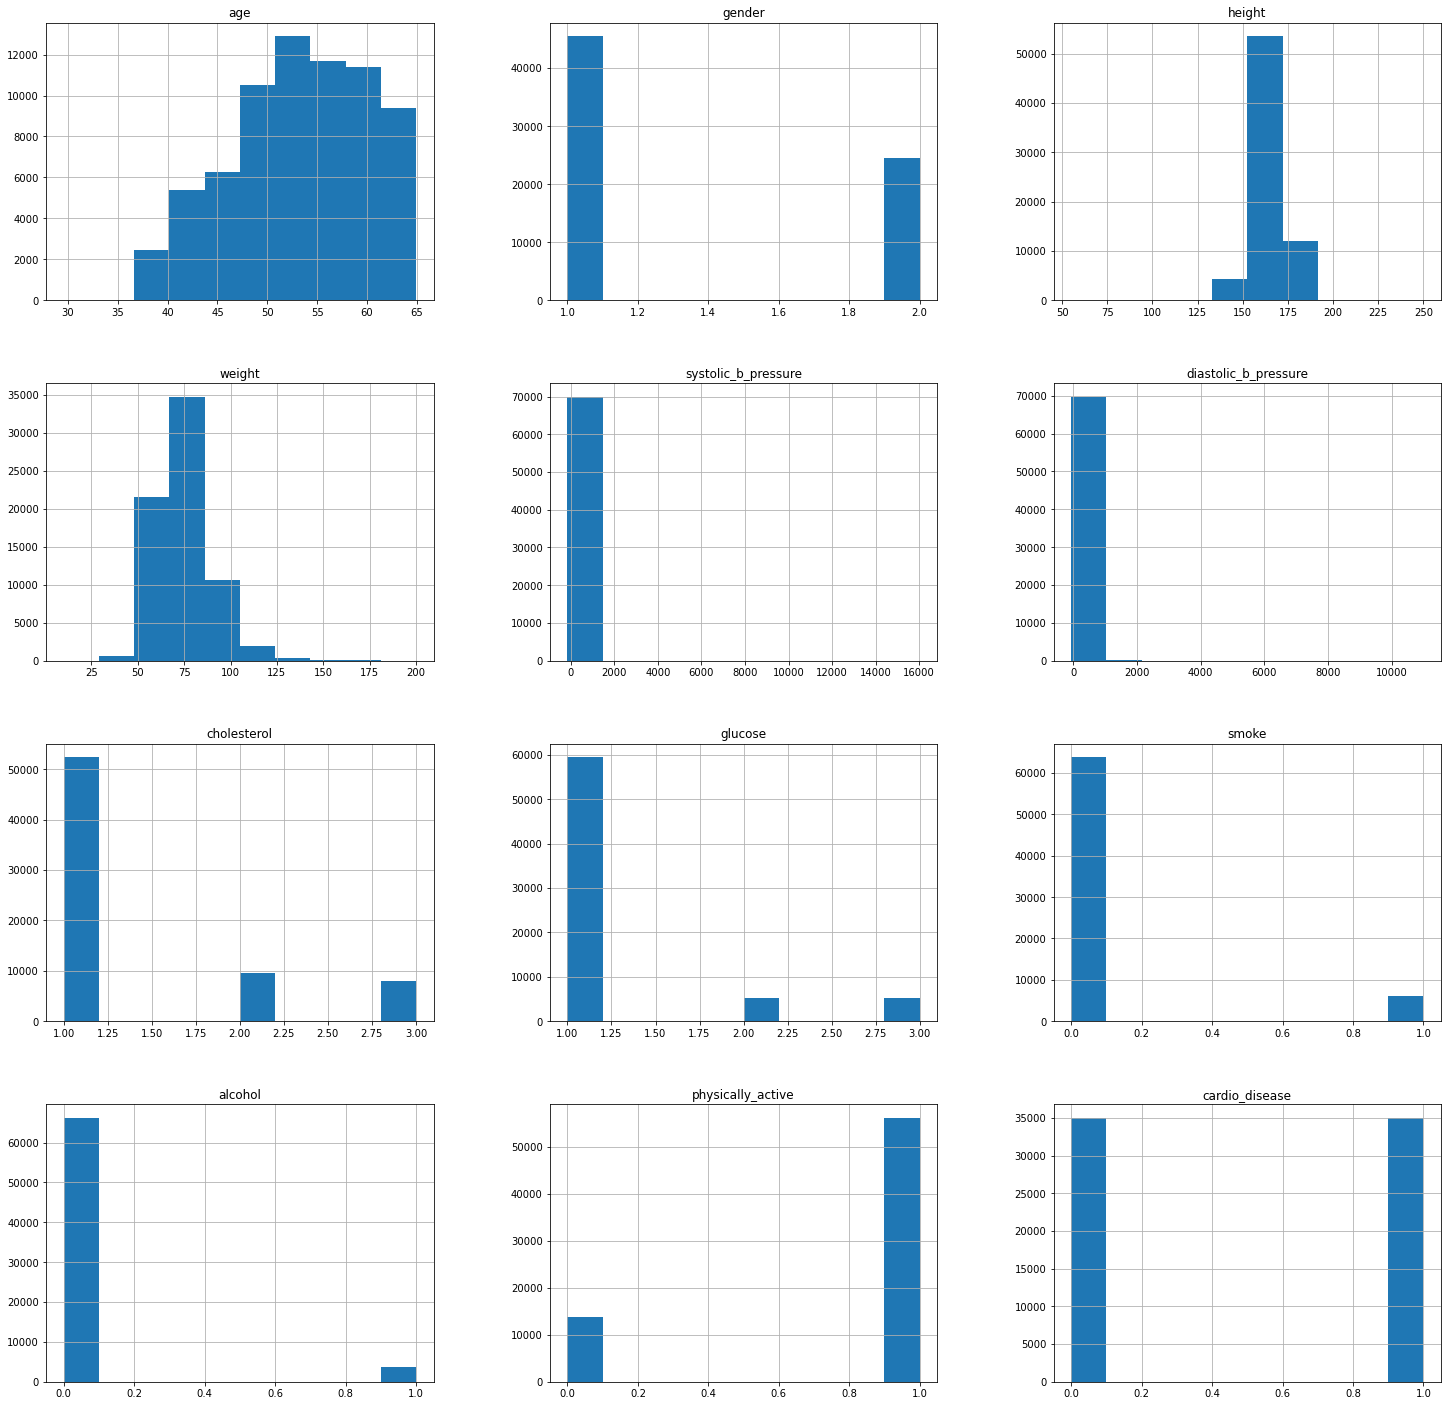

In [17]:
data.iloc[:,1:].hist(figsize=(25,25));

Анализ выбросов с помощью "ящиков с усами": Для некоторых ключевых числовых признаков построим "ящики с усами" (boxplot), чтобы выявить наличие выбросов и общие характеристики распределения данных. Это позволит нам обнаружить аномальные значения и оценить разброс данных.

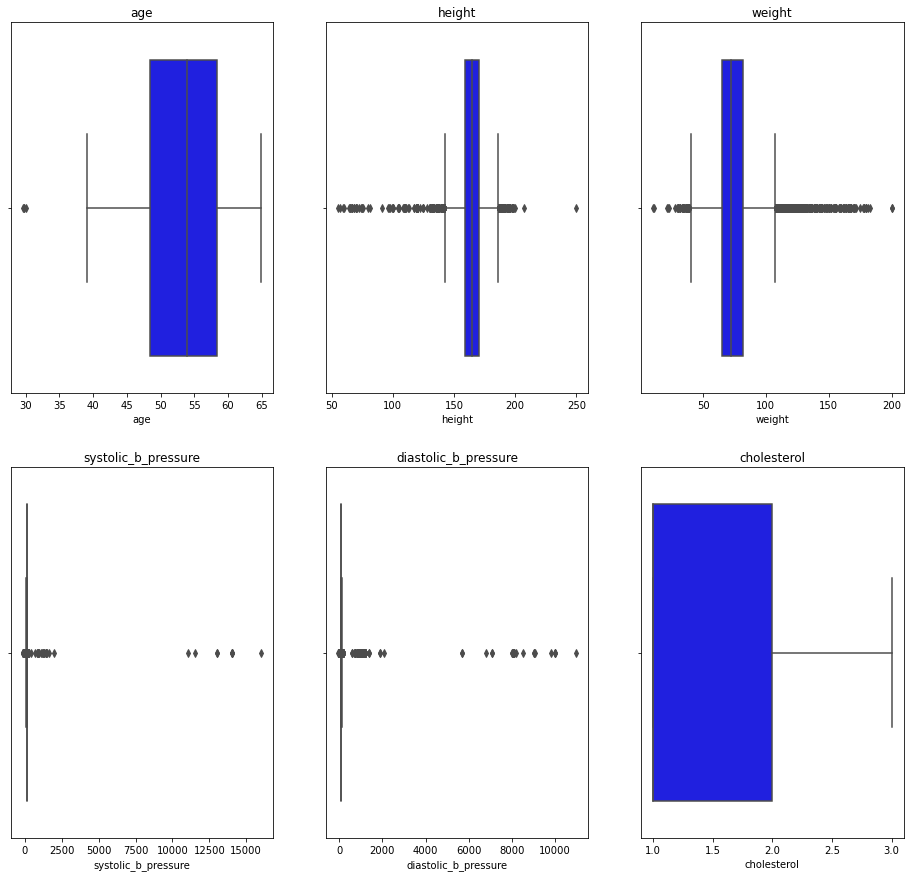

In [10]:
import warnings
warnings.filterwarnings("ignore")

cols = ['age', 'height', 'weight', 'systolic_b_pressure', 'diastolic_b_pressure', 'cholesterol']

ncols=3
nrows=2

fig, ax = plt.subplots(nrows, ncols, figsize=(16, 15))

cont = 0
for i in range(nrows):
    for j in range(ncols):
        sns.boxplot(data[cols[cont]], ax=ax[i][j], color='blue')
        ax[i][j].set_title(cols[cont])
        cont = cont + 1

Отображение корреляционной матрицы столбцов является еще одним важным шагом в предварительном анализе данных. Корреляционная матрица позволяет оценить степень линейной зависимости между всеми парами числовых признаков в датасете.  
Вывод на основе корреляционной матрицы представляет собой важный этап в предварительном анализе данных, который помогает понять взаимосвязи между признаками и определить наиболее значимые для модели признаки.

Text(0.5, 1.0, 'Корреляционная матрица набора данных')

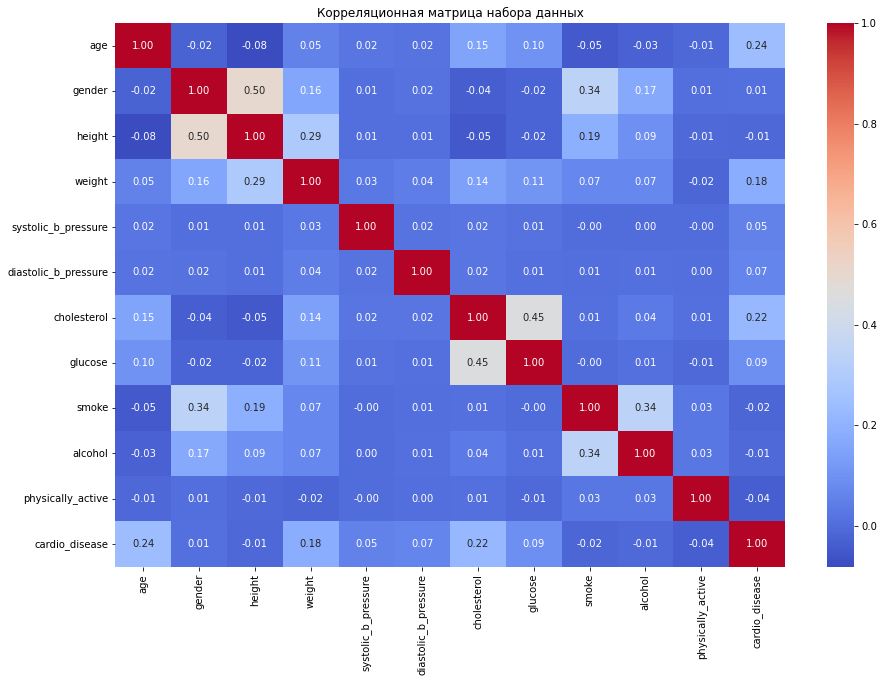

In [20]:
corr_matrix = data[['age', 'gender', 'height', 'weight', 'systolic_b_pressure',
       'diastolic_b_pressure', 'cholesterol', 'glucose', 'smoke', 'alcohol',
       'physically_active', 'cardio_disease']].corr()
plt.figure(figsize=(15, ))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Корреляционная матрица набора данных')

# Анализ

Разделим данные с помощью масштабируемых объектов:

In [21]:
# Разделение набора данных, выделение целевой переменной
X = data.drop(columns=['id', 'cardio_disease'])
y = data['cardio_disease']

# Стандартизация
scaler_std = StandardScaler()
X_standardized = scaler_std.fit_transform(X)

# Сохраним имена столбцов для последующего использования
feature_names = X.columns.tolist()
# Преобразуем стандартизированные данные обратно в DataFrame для удобства интерпретации
X_standardized_df = pd.DataFrame(X_standardized, columns=feature_names)

# Разделение стандартизированных данных на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X_standardized_df, y, test_size=0.2, random_state=1337)

# Тестирование и отбор моделей

Для прогнозирования сердечно-сосудистых заболеваний на основе нашего набора данных, который включает различные типы признаков (объективные, аналитические и субъективные), мы выбрали Три модели, которые считаются одними из лучших в этой задаче:

1. **Random Forest Classifier**: Эта модель идеально подходит для обработки разнообразных типов данных, включая числовые и категориальные признаки. Она способна обрабатывать сложные взаимосвязи между признаками без необходимости тщательной предварительной обработки данных. 

2. **Gradient Boosting Classifier**: Этот метод является мощным инструментом для выявления сложных закономерностей в данных. Он работает по принципу последовательного добавления слабых учащихся для исправления ошибок и может обеспечить высокую точность прогнозирования, особенно в случае несбалансированных данных.

3. **Logistic Regression**: Эта модель является фундаментальной для бинарной классификации и предоставляет понятное и интерпретируемое представление о взаимосвязи между признаками и целевой переменной. Она особенно полезна для понимания вероятности возникновения сердечно-сосудистых заболеваний на основе имеющихся данных.

Выбор этих моделей обусловлен их способностью обрабатывать разнообразные типы данных, выявлять сложные взаимосвязи в данных и обеспечивать высокую точность прогнозирования, что делает их эффективными инструментами для решения нашей задачи.

**Обучение Random Forest Classifier**

In [13]:
# загрузка и обучение модели
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

# отображение результатов обучения и тестов
print('Train Accuracy: ', rf.score(X_train,y_train))
print('Test Accuracy: ', rf.score(X_test,y_test))

Train Accuracy:  0.9998571428571429
Test Accuracy:  0.7104285714285714


Тепловая карта позволит нам также наглядно представить структуру корреляционной матрицы и выявить закономерности между признаками:

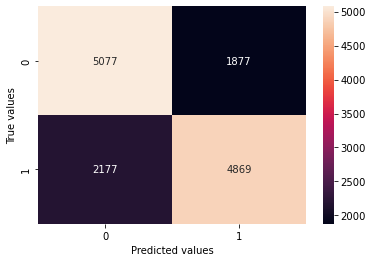

In [14]:
sns.heatmap(confusion_matrix(y_test, rf.predict(X_test)), annot=True, fmt='0')
plt.ylabel('True values')
plt.xlabel('Predicted values')
plt.show()

**Обучение GradientBoostingClassifier**

In [15]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

print('Train Accuracy: ',gbc.score(X_train,y_train))
print('Test Accuracy: ', gbc.score(X_test,y_test))

Train Accuracy:  0.7409464285714286
Test Accuracy:  0.7291428571428571


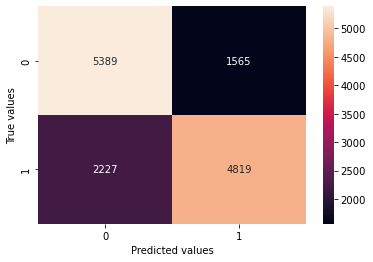

In [16]:
sns.heatmap(confusion_matrix(y_test, gbc.predict(X_test)), annot=True, fmt='0')
plt.ylabel('True values')
plt.xlabel('Predicted values')
plt.show()

**Обучение LogisticRegression**

In [17]:
lr = LogisticRegression(max_iter=10_000)
lr.fit(X_train,y_train)

print('Train Accuracy: ',lr.score(X_train,y_train))
print('Test Accuracy: ', lr.score(X_test,y_test))

Train Accuracy:  0.7242678571428571
Test Accuracy:  0.7133571428571429


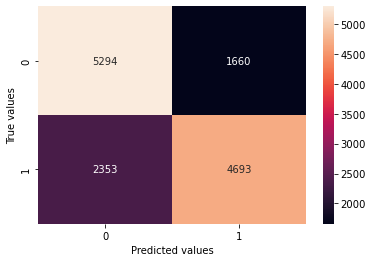

In [18]:
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test)), annot=True, fmt='0')
plt.ylabel('True values')
plt.xlabel('Predicted values')
plt.show()

**Stochastic Gradient Descent (SGD) Classifier** - это метод классификации в машинном обучении, который использует итеративный процесс оптимизации для нахождения оптимальных коэффициентов линейных моделей. Этот алгоритм работает на основе градиентного спуска, который обновляет параметры модели на каждом шаге, минимизируя функцию потерь.  
  
В данном случае, использование SGD Classifier имеет свою важность. Он позволяет эффективно решать задачи классификации, особенно при работе с большими объемами данных. Поскольку SGD Classifier является одним из методов линейных моделей, его можно использовать для прогнозирования на основе обучающих данных, что делает его ценным инструментом в анализе медицинских данных для диагностики заболеваний, включая сердечно-сосудистые.  
  
Использование SGD Classifier позволит нам найти оптимальные параметры модели, что может улучшить точность прогнозирования и обеспечить более надежные результаты.

In [19]:
sgd = SGDClassifier(loss='log_loss')
sgd.fit(X_train,y_train)

print('Train Accuracy: ',sgd.score(X_train,y_train))
print('Test Accuracy: ', sgd.score(X_test,y_test))

Train Accuracy:  0.7121964285714286
Test Accuracy:  0.7029285714285715


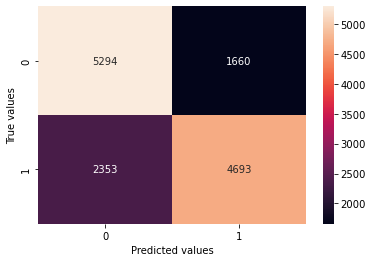

In [20]:
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test)), annot=True, fmt='0')
plt.ylabel('True values')
plt.xlabel('Predicted values')
plt.show()

# Разделение объектов на категории

1. **Объективные особенности**: Эти факторы характеризуют пациентов с точки зрения их базовых характеристик. Включают в себя возраст, рост, вес и пол.

2. **Особенности проверки**: Эти особенности основаны на результатах медицинских обследований пациентов. Они включают в себя значения систолического и диастолического артериального давления, уровень холестерина и уровень глюкозы.

3. **Субъективные особенности**: Эти факторы основаны на самооценке или привычках пациентов. Включают в себя информацию о курении, употреблении алкоголя и физической активности.

Этот подход позволит нам более полно оценить пациентов и определить категории риска развития сердечно-сосудистых заболеваний на основе различных аспектов их жизни и состояния здоровья.

In [27]:
# объективные особенности
objective_features = ['age', 'height', 'weight', 'gender']
# особенности проверки
examination_features = ['systolic_b_pressure', 'diastolic_b_pressure', 'cholesterol', 'glucose']
# субъективные особенности
subjective_features = ['smoke', 'alcohol', 'physically_active']

# **Функция для оценки модели**

Эта функция предназначена для оценки производительности модели машинного обучения на заданном наборе данных.

Она принимает два параметра:
- `features` - список имен столбцов, которые будут использоваться в качестве признаков модели.
- `model` - объект модели машинного обучения, который необходимо оценить.

Далее функция обучает модель на подмножестве набора данных, определяемого указанными признаками, и затем оценивает ее производительность на отдельном тестовом наборе. 

Возвращает словарь с показателями производительности модели:
- 'accuracy': Точность модели в тестовом наборе.
- 'precision': Точность модели в тестовом наборе.
- "recall": Отзыв модели из тестового набора.
- "f1": Оценка F1 модели из тестового набора.
- "auc": Площадь под кривой ROC для модели из тестового набора.

In [25]:
def evaluate_model(features, model):
    model = model
    model.fit(X_train[features], y_train)
    predictions = model.predict(X_test[features])
    # вероятностные оценки положительного класса
    probabilities = model.predict_proba(X_test[features])[:, 1]
    
    return {
        'accuracy': accuracy_score(y_test, predictions),
        'precision': precision_score(y_test, predictions),
        'recall': recall_score(y_test, predictions),
        'f1': f1_score(y_test, predictions),
        'auc': roc_auc_score(y_test, probabilities), }

Функция `print_score` предназначена для вывода результатов оценки модели машинного обучения на различных наборах характеристик.

Она принимает один аргумент:
- `model`: объект модели машинного обучения, который требуется оценить.

Функция вызывает функцию `evaluate_model` для каждого из четырех наборов характеристик:
1. `objective_features` - набор объективных характеристик.
2. `examination_features` - набор характеристик проверки.
3. `subjective_features` - набор субъективных характеристик.
4. Комбинированный набор характеристик, включающий все три вышеперечисленных набора.

Затем функция выводит результаты оценки для каждого набора характеристик, включая точность, прецизионность, отзывчивость, оценку F1 и показатели AUC.

Эта функция не возвращает никакого значения, а просто выводит результаты оценки.

In [23]:
def print_score(model):
    # Оценка моделей, основанных на различных наборах функций
    objective_results = evaluate_model(objective_features,model)
    examination_results = evaluate_model(examination_features,model)
    subjective_results = evaluate_model(subjective_features, model)
    combined_results = evaluate_model(objective_features + examination_features + subjective_features, model)
    print(f"'Objective_results:\n',{objective_results}'\n\n', 'Subjective_results:\n'{subjective_results}'\n\n', 'Examination_results:\n'{examination_results}'\n\n', 'Combined_results:\n'{combined_results}")

**Поиск по сетке для случайной модели леса**

Он позволит нам найти оптимальные гиперпараметры этой модели путем систематического перебора различных комбинаций значений гиперпараметров и выбора тех, которые обеспечивают наилучшую производительность модели.

Параметры, которые обычно подлежат поиску по сетке для случайного леса, включают:
- Количество деревьев в лесу (n_estimators)
- Максимальную глубину деревьев (max_depth)
- Минимальное количество выборок, необходимых для разделения внутреннего узла (min_samples_split)
- Минимальное количество выборок, необходимых для листа (min_samples_leaf)
- Максимальное количество признаков, рассматриваемых при разделении (max_features)

Путем поиска по сетке мы сможем определить оптимальные значения этих параметров для нашего случайного леса, что позволит улучшить его производительность и точность предсказаний.

In [24]:
# Настройка гиперпараметров с помощью GridSearchCV
param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [5, 10, 15]}

In [25]:
# Выбор наилучших параметров
grid_search = GridSearchCV(rf, param_grid, cv=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print('Best Parameters: ', best_params)

Best Parameters:  {'max_depth': 10, 'n_estimators': 300}


Этот вывод представляет наилучшие параметры, найденные в результате поиска по сетке (Grid Search), для модели случайного леса (Random Forest). Оптимальные параметры включают:
- `max_depth`: глубина деревьев равна 10.
- `n_estimators`: количество деревьев в лесу равно 300.

Эти значения параметров были выбраны как оптимальные на основе проведенного поиска по сетке с использованием кросс-валидации на обучающем наборе данных. Они обеспечивают наилучшую производительность модели случайного леса на тестовых данных.

In [28]:
# Инициировать модель
rf = RandomForestClassifier(random_state=0, max_depth=10, n_estimators=300)
# Отображение результатов
print_score(rf)

'Objective_results:
',{'accuracy': 0.6170714285714286, 'precision': 0.6185450963838469, 'recall': 0.6239000851546977, 'f1': 0.6212110506606373, 'auc': 0.6626889540780985}'

', 'Subjective_results:
'{'accuracy': 0.5155714285714286, 'precision': 0.5442359249329759, 'recall': 0.2304853817768947, 'f1': 0.32382851445663013, 'auc': 0.5187663308072652}'

', 'Examination_results:
'{'accuracy': 0.7195714285714285, 'precision': 0.7559894978667542, 'recall': 0.6538461538461539, 'f1': 0.7012176560121766, 'auc': 0.7688299866173812}'

', 'Combined_results:
'{'accuracy': 0.7298571428571429, 'precision': 0.7607861936720998, 'recall': 0.6757025262560318, 'f1': 0.7157245941070355, 'auc': 0.799013371679479}


Этот вывод представляет результаты оценки модели случайного леса (Random Forest) на различных наборах характеристик: объективных, субъективных, основанных на проверке и комбинированных.

Результаты показывают, что производительность модели варьируется в зависимости от набора характеристик:
- Для набора объективных характеристик точность составляет около 61.7%, precision - 61.9%, recall - 62.4%, оценка F1 - 62.1% и площадь под кривой ROC (AUC) - 66.3%.
- Для субъективных характеристик точность составляет примерно 51.6%, precision - 54.4%, recall - 23.0%, оценка F1 - 32.4% и площадь под кривой ROC (AUC) - 51.9%.
- Для характеристик, основанных на проверке, точность составляет около 71.9%, precision - 75.6%, recall - 65.4%, оценка F1 - 70.1% и площадь под кривой ROC (AUC) - 76.9%.
- Для комбинированных характеристик точность составляет приблизительно 72.9%, precision - 76.1%, recall - 67.6%, оценка F1 - 71.6% и площадь под кривой ROC (AUC) - 79.9%.

Эти результаты показывают, что модель показывает наилучшую производительность при использовании характеристик, основанных на проверке, и комбинированных характеристик, что подтверждает их значимость для предсказания сердечно-сосудистых заболеваний.

# **Важность признака (модель случайного леса)**

Важность признака в модели случайного леса представляет собой меру влияния каждого признака на результат предсказания модели. Она оценивается на основе того, насколько сильно каждый признак уменьшает неопределенность (impurity) в деревьях леса. Чем больше уменьшение неопределенности происходит за счет разбиения по данному признаку, тем выше его важность.

Важность признака позволяет оценить, какие признаки оказывают наибольшее влияние на целевую переменную и в какой степени. Это помогает понять, какие признаки следует учитывать при принятии решений или какие признаки могут быть наиболее информативными для построения модели.

Интерпретация важности признака может помочь в выявлении основных факторов, влияющих на целевую переменную, и определении наиболее значимых аспектов данных для построения модели.

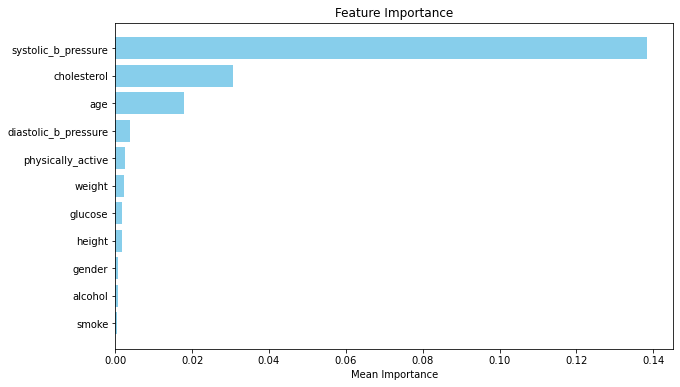

In [29]:
# Обучаем модель
model = rf
model.fit(X_train, y_train)

# Выполним перестановку значений важности, чтобы оценить важность каждой функции
results = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0, n_jobs=-1)

# Организуем результаты в виде фрейма данных
importance_df = pd.DataFrame({'feature': X_train.columns, 'importance_mean': results.importances_mean})

# Отсортируем объекты по их важности
importance_df = importance_df.sort_values(by='importance_mean', ascending=False)

# Построение графика важности объектов
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance_mean'], color='skyblue')
plt.xlabel('Mean Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

На основе данного графика видно, что наибольшее влияние на болезни сердечно-сосудистой системы оказывает систолическое артериальное давление

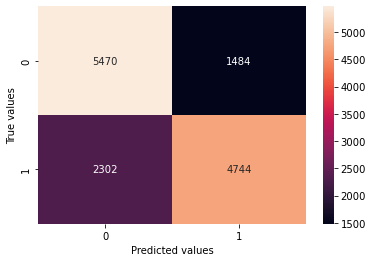

In [30]:
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt='0')
plt.ylabel('True values')
plt.xlabel('Predicted values')
plt.show()

# ROC Curve

Характеристика ROC (Receiver Operating Characteristic) Curve - это график, который отображает производительность бинарного классификатора по всем возможным значениям порога. Она показывает отношение между долей верно положительных и долей ложноположительных результатов при различных значениях порога классификации.

На мой взгляд, ROC-кривая полезна по нескольким причинам:

1. **Оценка производительности модели:** ROC-кривая позволяет визуально оценить производительность классификатора. Чем ближе кривая к верхнему левому углу графика, тем лучше производительность модели.

2. **Сравнение моделей:** Путем сравнения ROC-кривых для различных моделей можно определить, какая модель лучше справляется с классификацией. Модель с большей площадью под ROC-кривой обычно считается более эффективной.

3. **Выбор оптимального порога классификации:** ROC-кривая помогает найти оптимальный порог классификации, который максимизирует чувствительность и специфичность модели.

4. **Устойчивость к дисбалансу классов:** ROC-кривая остается информативной даже в случае дисбаланса классов, что делает ее полезной метрикой для задач с несбалансированными данными.

In [31]:
# Функция для получения вероятностных оценок
def probability_score(features, X_train, X_test, y_train, y_test, model):
    model = rf
    model.fit(X_train[features], y_train)
    probabilities = model.predict_proba(X_test[features])[:, 1]  # Получим вероятности для положительного класса

    fpr, tpr, thresholds = roc_curve(y_test, probabilities)  # Вычислим кривую ROC
    auc_score = roc_auc_score(y_test, probabilities)  # Рассчитаем оценку AUC
    
    return fpr, tpr, auc_score

In [32]:
combined_features = objective_features + examination_features + subjective_features
# Оценим свою модель (предполагая, что наилучей моделью является voting_clf)
fpr, tpr, auc_score = probability_score(combined_features, X_train, X_test, y_train, y_test, rf)

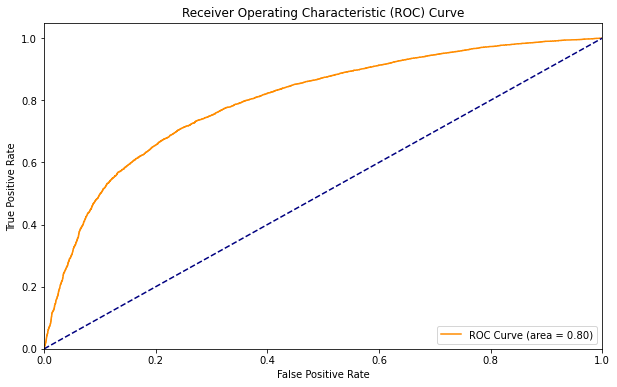

In [33]:
# Построим ROC-кривую
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Проверка на переобучение**

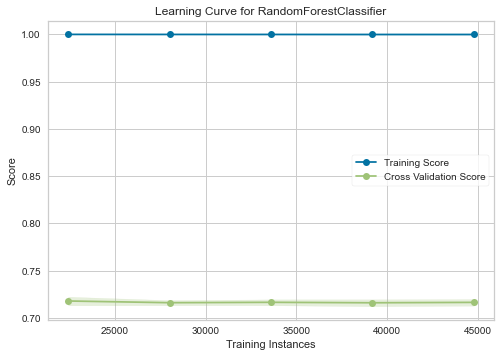

In [34]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(RandomForestClassifier(), train_sizes=np.linspace(0.5, 1.0, 5)).fit(X_train, y_train).show()

# Выбор наилучшей модели

В результате анализа производительности различных моделей машинного обучения для задачи прогнозирования заболеваний сердечно-сосудистой системы наилучшей моделью оказался RandomForestClassifier с параметрами max_depth = 10, n_estimators = 300. Данная модель продемонстрировала следующие значения производительности на тестовом наборе данных:

- Точность (accuracy): 72.99%
- Прецизионность (precision): 76.08%
- recall: 67.57%
- Оценка F1 (F1 score): 71.57%
- Площадь под кривой ROC (AUC): 79.90%

Эти результаты свидетельствуют о высокой способности модели RandomForestClassifier правильно классифицировать пациентов с сердечно-сосудистыми заболеваниями.

Относительно важности признаков для предсказания заболеваний сердечно-сосудистой системы, наибольшее влияние оказывает систолическое артериальное давление, за которым следует уровень холестерина, а затем возраст. Эти результаты подчеркивают важность мониторинга артериального давления и уровня холестерина в процессе диагностики и профилактики сердечно-сосудистых заболеваний.

Исходя из результатов модели **RandomForestClassifier**, точность классификации составляет примерно 72.99%. Это означает, что в примерно 73% случаев модель правильно классифицирует наличие или отсутствие заболеваний сердечно-сосудистой системы.

# Вывод

Из результатов анализа модели RandomForestClassifier для прогнозирования заболеваний сердечно-сосудистой системы становится очевидным, что такие факторы, как систолическое артериальное давление, уровень холестерина и возраст, играют ключевую роль в диагностике и прогнозировании сердечно-сосудистых заболеваний. 

1. **Систолическое артериальное давление**: Высокое значение систолического артериального давления (верхнее давление) является одним из основных факторов риска для развития сердечно-сосудистых заболеваний. Это связано с тем, что повышенное давление оказывает негативное воздействие на стенки артерий, увеличивая вероятность развития атеросклероза и других сердечно-сосудистых проблем.

2. **Уровень холестерина**: Высокий уровень холестерина в крови также является фактором риска для сердечно-сосудистых заболеваний. Повышенный холестерин способствует образованию бляшек внутри артерий, что может привести к их закупорке и развитию сердечно-сосудистых заболеваний, таких как инфаркт миокарда и инсульт.

3. **Возраст**: Старение является неизбежным фактором риска для развития сердечно-сосудистых заболеваний. С возрастом артерии становятся менее эластичными, увеличивая риск их повреждения и развития сердечно-сосудистых проблем.

Исходя из этих результатов, можно заключить, что раннее обнаружение и контроль вышеупомянутых факторов риска являются важными шагами для профилактики сердечно-сосудистых заболеваний. Регулярные медицинские обследования, поддержание здорового образа жизни, включая сбалансированное питание и регулярные физические упражнения, а также своевременное лечение выявленных заболеваний могут существенно снизить риск сердечно-сосудистых заболеваний и улучшить качество жизни.